In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from models.scripts.utils import split_date, load_csv, create_lags, add_seasonality

ticker = 'AAPL'
df = load_csv(ticker)
df = split_date(df)

In [2]:
df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close,Year,Month,Day
0,1980-12-12,0.128348,0.128348,469033600,0.128906,0.128348,0.099874,1980,12,12
1,1980-12-15,0.121652,0.122210,175884800,0.122210,0.121652,0.094663,1980,12,15
2,1980-12-16,0.112723,0.113281,105728000,0.113281,0.112723,0.087715,1980,12,16
3,1980-12-17,0.115513,0.115513,86441600,0.116071,0.115513,0.089886,1980,12,17
4,1980-12-18,0.118862,0.118862,73449600,0.119420,0.118862,0.092492,1980,12,18


In [3]:
# Calculate the mean close price per month
monthly_mean = df.groupby([ 'Month'])['Close'].mean().reset_index()

# Calculate the mean close price per year
yearly_mean = df.groupby([ 'Year'])['Close'].mean().reset_index()

In [4]:
monthly_mean

,Month,Close
0,1,14.842134
1,2,15.349828
2,3,15.355185
3,4,15.558388
4,5,15.240276
5,6,15.526164
6,7,16.383598
7,8,17.849878
8,9,17.883631
9,10,17.300592


In [5]:
yearly_mean

,Year,Close
0,1980,0.135903
1,1981,0.108548
2,1982,0.085459
3,1983,0.167274
4,1984,0.119651
5,1985,0.090233
6,1986,0.144913
7,1987,0.347751
8,1988,0.370884
9,1989,0.371953


TypeError: xticks() got multiple values for argument 'labels'

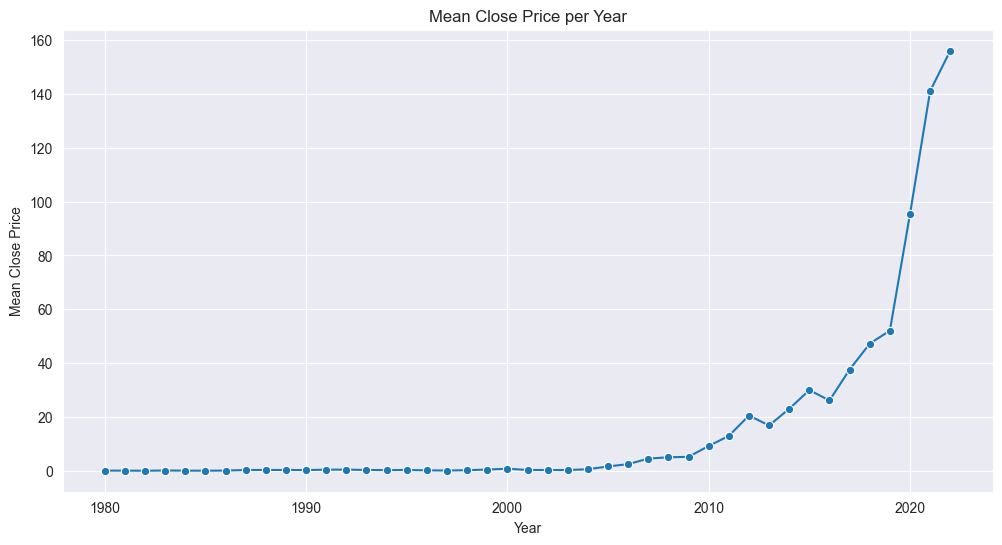

In [6]:
lst_year= yearly_mean['Year'].tolist()

# Using a line plot instead
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.lineplot(data=yearly_mean, x='Year', y='Close', marker='o')  # marker='o' adds dots at each data point

plt.title('Mean Close Price per Year')
plt.xlabel('Year')
plt.ylabel('Mean Close Price')

plt.xticks(0, len(lst_year), labels=lst_year, rotation=45)  # Plot every nth year
plt.grid(True)  # Adds a grid for better readability

plt.tight_layout()
plt.show()


TypeError: xticks() got multiple values for argument 'labels'

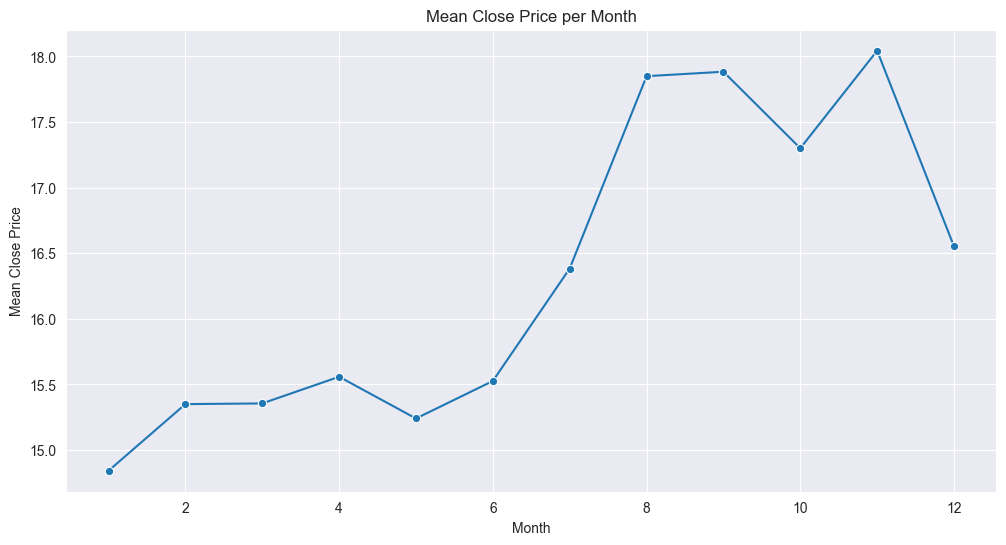

In [7]:
lst_month= monthly_mean['Month'].tolist()

# Using a line plot instead
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.lineplot(data=monthly_mean, x='Month', y='Close', marker='o')  # marker='o' adds dots at each data point

plt.title('Mean Close Price per Month')
plt.xlabel('Month')
plt.ylabel('Mean Close Price')

plt.xticks(0, len(lst_month), labels=lst_month)  # Plot every nth month
plt.grid(True)  # Adds a grid for better readability

plt.tight_layout()
plt.show()

### Fourier Transform

In [9]:
# Fourier Transform
from numpy.fft import rfft
import numpy as np

# Choose a relevant column, for example, 'Close'
data = df['Close'].values

# Apply Fourier Transform
fourier_transform = rfft(data)

# Get frequencies
frequencies = np.fft.rfftfreq(len(data), d=1)  # d is the sample spacing
amplitudes = np.abs(fourier_transform)

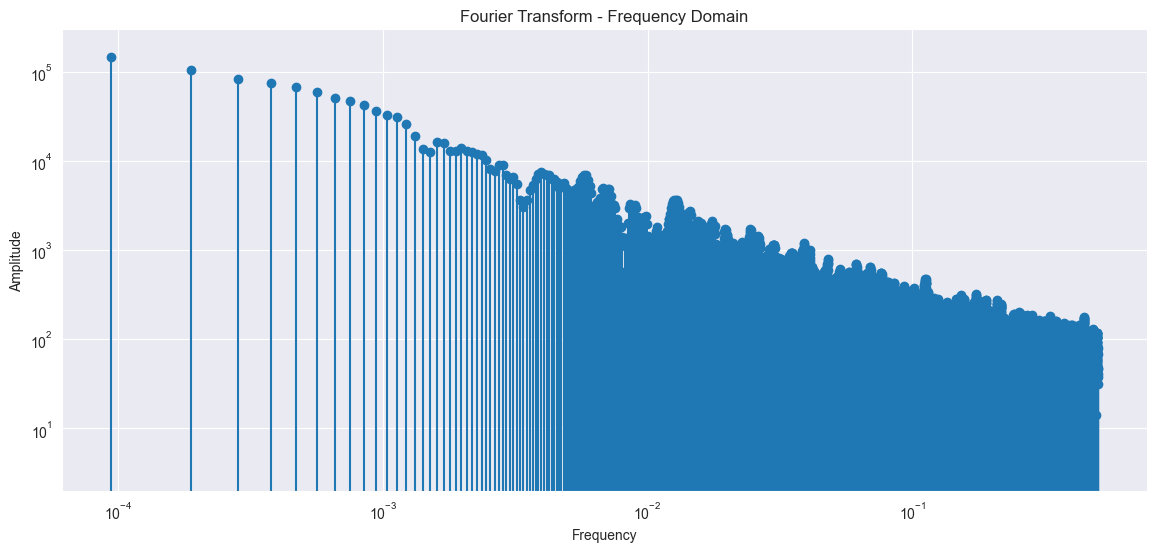

In [10]:
plt.figure(figsize=(14, 6))
plt.stem(frequencies, amplitudes)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform - Frequency Domain')
plt.show()

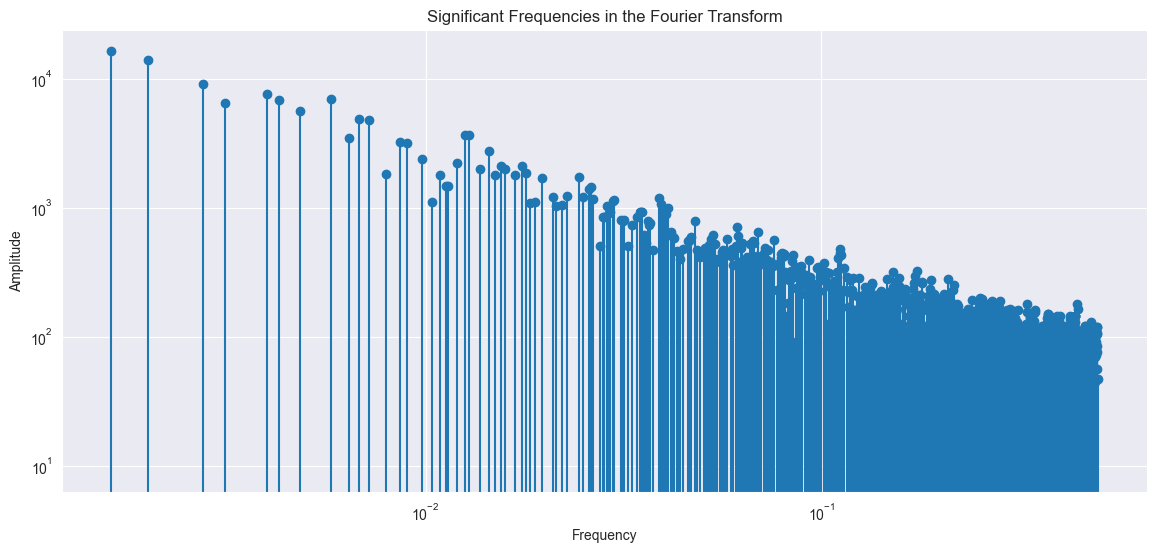

Frequency: 0.0016052880075542965, Period: 622.9411764705883 (time units)
Frequency: 0.0019830028328611895, Period: 504.28571428571433 (time units)
Frequency: 0.002738432483474976, Period: 365.1724137931035 (time units)
Frequency: 0.0031161473087818695, Period: 320.90909090909093 (time units)
Frequency: 0.003966005665722379, Period: 252.14285714285717 (time units)
Frequency: 0.004249291784702549, Period: 235.33333333333337 (time units)
Frequency: 0.004815864022662889, Period: 207.64705882352942 (time units)
Frequency: 0.005760151085930122, Period: 173.6065573770492 (time units)
Frequency: 0.006421152030217186, Period: 155.73529411764707 (time units)
Frequency: 0.006798866855524079, Period: 147.08333333333334 (time units)
Frequency: 0.007176581680830972, Period: 139.34210526315792 (time units)
Frequency: 0.007932011331444758, Period: 126.07142857142858 (time units)
Frequency: 0.008593012275731822, Period: 116.37362637362638 (time units)
Frequency: 0.008970727101038715, Period: 111.473684

In [11]:
from scipy.signal import find_peaks

# Find Peaks in the Amplitudes to Identify Significant Frequencies
peaks, _ = find_peaks(amplitudes, height=0)  # Adjust height as needed to filter out noise

# Extract Frequencies corresponding to the Peaks
significant_freqs = frequencies[peaks]
significant_amps = amplitudes[peaks]

# Optional - Plot the Frequencies and Amplitudes
plt.figure(figsize=(14, 6))
plt.stem(significant_freqs, significant_amps)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Significant Frequencies in the Fourier Transform')
plt.show()

# Convert Frequencies to Time Periods
significant_periods = 1 / significant_freqs

# Print the significant frequencies and their corresponding periods
for freq, period in zip(significant_freqs, significant_periods):
    print(f"Frequency: {freq}, Period: {period} (time units)")

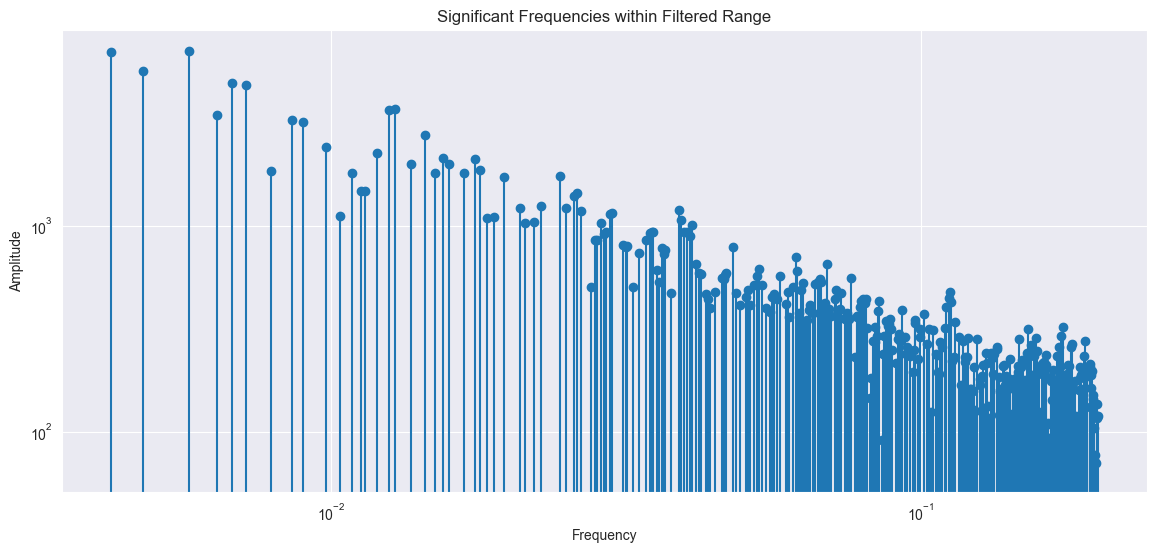

Frequency: 0.004249291784702549, Period: 235.33333333333337 (time units)
Frequency: 0.004815864022662889, Period: 207.64705882352942 (time units)
Frequency: 0.005760151085930122, Period: 173.6065573770492 (time units)
Frequency: 0.006421152030217186, Period: 155.73529411764707 (time units)
Frequency: 0.006798866855524079, Period: 147.08333333333334 (time units)
Frequency: 0.007176581680830972, Period: 139.34210526315792 (time units)
Frequency: 0.007932011331444758, Period: 126.07142857142858 (time units)
Frequency: 0.008593012275731822, Period: 116.37362637362638 (time units)
Frequency: 0.008970727101038715, Period: 111.47368421052633 (time units)
Frequency: 0.009820585457979225, Period: 101.82692307692308 (time units)
Frequency: 0.010387157695939566, Period: 96.27272727272727 (time units)
Frequency: 0.01085930122757318, Period: 92.08695652173914 (time units)
Frequency: 0.011237016052880074, Period: 88.99159663865547 (time units)
Frequency: 0.011425873465533521, Period: 87.520661157024

In [12]:
# Define Frequency Range for Filtering
min_freq = 1 / 252 
max_freq = 1 / 5

# Filter out frequencies outside this range
filtered_indices = np.where((frequencies >= min_freq) & (frequencies <= max_freq))
filtered_freqs = frequencies[filtered_indices]
filtered_amps = amplitudes[filtered_indices]

# Find Peaks within the Filtered Frequencies
peaks, _ = find_peaks(filtered_amps, height=0)  # Adjust height as needed

# Extract Frequencies and Amplitudes of the Peaks
significant_freqs = filtered_freqs[peaks]
significant_amps = filtered_amps[peaks]

# Plot the Filtered Frequencies and Amplitudes
plt.figure(figsize=(14, 6))
plt.stem(significant_freqs, significant_amps)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Significant Frequencies within Filtered Range')
plt.show()

# Convert Frequencies to Time Periods
significant_periods = 1 / significant_freqs

# Print the significant frequencies and their corresponding periods
for freq, period in zip(significant_freqs, significant_periods):
    print(f"Frequency: {freq}, Period: {period} (time units)")

In [13]:
# Convert Frequencies to Periods
significant_periods = 1 / significant_freqs

monthly_range = range(17, 23)
# yearly_range = range(245, 256)

# Interpretation
for freq, period in zip(significant_freqs, significant_periods):
    # Approximate the period to the nearest integer for easier interpretation
    approx_period = round(period)

    if approx_period in monthly_range:
        print(f"Frequency: {freq} - Pattern with period of {approx_period} days")

Frequency: 0.04475920679886685 - Pattern with period of 22 days
Frequency: 0.04608120868744098 - Pattern with period of 22 days
Frequency: 0.04636449480642115 - Pattern with period of 22 days
Frequency: 0.0465533522190746 - Pattern with period of 21 days
Frequency: 0.046836638338054765 - Pattern with period of 21 days
Frequency: 0.047969782813975445 - Pattern with period of 21 days
Frequency: 0.048536355051935785 - Pattern with period of 21 days
Frequency: 0.04948064211520302 - Pattern with period of 20 days
Frequency: 0.05051935788479697 - Pattern with period of 20 days
Frequency: 0.05099150141643059 - Pattern with period of 20 days
Frequency: 0.051369216241737486 - Pattern with period of 19 days
Frequency: 0.05212464589235127 - Pattern with period of 19 days
Frequency: 0.052691218130311614 - Pattern with period of 19 days
Frequency: 0.05316336166194523 - Pattern with period of 19 days
Frequency: 0.053824362606232294 - Pattern with period of 19 days
Frequency: 0.054579792256846074 - P

/Users/lucapetracca/anaconda3/envs/dmts/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/lucapetracca/anaconda3/envs/dmts/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


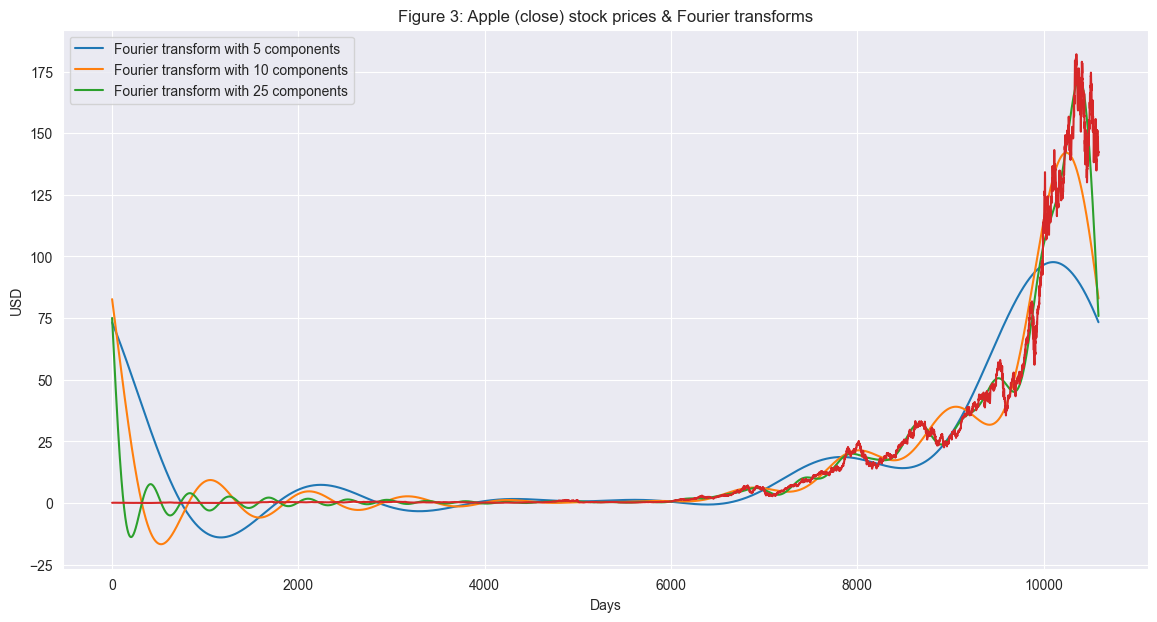

In [14]:
close_fft = np.fft.fft(np.asarray(df['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [5, 10, 25]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot( df['Close'])
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 3: Apple (close) stock prices & Fourier transforms')
plt.legend()
plt.show()

### Lag Features

In [15]:
lag_df = create_lags(df, 3)

In [16]:
lag_df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close,Year,Month,Day,lag_1,lag_2,lag_3
0,1980-12-12,0.128348,0.128348,469033600,0.128906,0.128348,0.099874,1980,12,12,0.128348,0.128348,0.128348
1,1980-12-15,0.121652,0.122210,175884800,0.122210,0.121652,0.094663,1980,12,15,0.128348,0.128348,0.128348
2,1980-12-16,0.112723,0.113281,105728000,0.113281,0.112723,0.087715,1980,12,16,0.121652,0.128348,0.128348
3,1980-12-17,0.115513,0.115513,86441600,0.116071,0.115513,0.089886,1980,12,17,0.112723,0.121652,0.128348
4,1980-12-18,0.118862,0.118862,73449600,0.119420,0.118862,0.092492,1980,12,18,0.115513,0.112723,0.121652


### Seasonality Index


In [17]:
df = add_seasonality(df)
df.head(100)

,Date,Low,Open,Volume,High,Close,Adjusted Close,Year,Month,Day,Month_Category_Bearish,Month_Category_Bullish,Month_Category_Normal
0,1980-12-12,0.128348,0.128348,469033600,0.128906,0.128348,0.099874,1980,12,12,1.0,0.0,0.0
1,1980-12-15,0.121652,0.122210,175884800,0.122210,0.121652,0.094663,1980,12,15,1.0,0.0,0.0
2,1980-12-16,0.112723,0.113281,105728000,0.113281,0.112723,0.087715,1980,12,16,1.0,0.0,0.0
3,1980-12-17,0.115513,0.115513,86441600,0.116071,0.115513,0.089886,1980,12,17,1.0,0.0,0.0
4,1980-12-18,0.118862,0.118862,73449600,0.119420,0.118862,0.092492,1980,12,18,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1981-04-30,0.126674,0.126674,12611200,0.127790,0.126674,0.098571,1981,4,30,0.0,1.0,0.0
96,1981-05-01,0.126674,0.126674,16553600,0.127790,0.126674,0.098571,1981,5,1,0.0,1.0,0.0
97,1981-05-04,0.126116,0.126674,14448000,0.126674,0.126116,0.098137,1981,5,4,0.0,1.0,0.0
98,1981-05-05,0.125558,0.126116,17539200,0.126116,0.125558,0.097703,1981,5,5,0.0,1.0,0.0


## Autocorrelation

Autocorrelation measures the linear relationship between lagged values of a time series. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

Setting 'Date' as the index and resampling to monthly averages is essential for meaningful autocorrelation analysis, to understand whether previous monthly 'Close' values are correlated to the future ones. 

In [18]:
df.set_index('Date', inplace=True)
monthly_df = df['Close'].resample('M').mean()

In [19]:
monthly_df

Date
1980-12-31      0.135903
1981-01-31      0.141316
1981-02-28      0.117892
1981-03-31      0.110871
1981-04-30      0.121545
                 ...    
2022-08-31    166.885218
2022-09-30    153.002856
2022-10-31    145.013333
2022-11-30    145.843331
2022-12-31    144.206251
Freq: M, Name: Close, Length: 505, dtype: float64

The provided code generates autocorrelation plots for the monthly average data in `monthly_df`, showing correlations at different lags. The first plot displays long-term autocorrelation (up to 90 lags), while the second focuses on short-term (up to 30 lags).

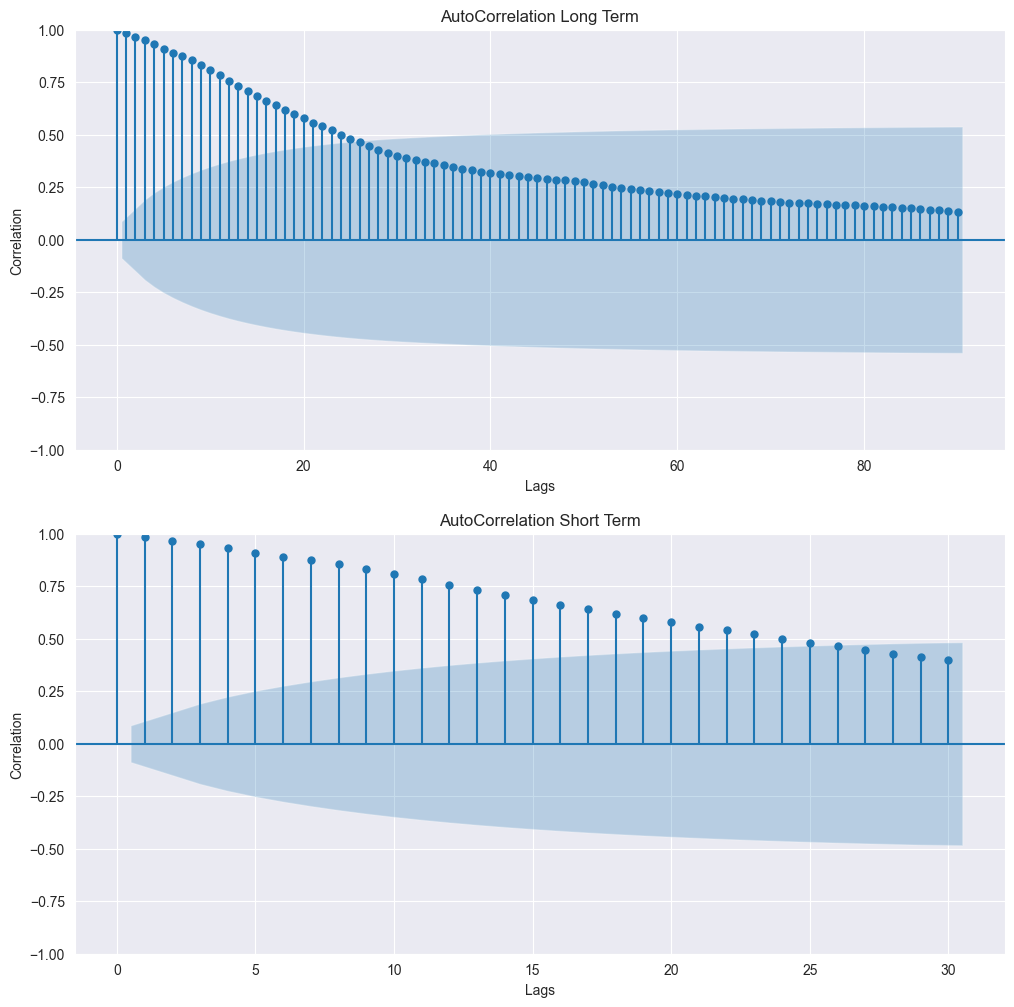

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 12))

# AutoCorrelation for Long Term
acf = plot_acf(monthly_df, lags=90, ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')

# AutoCorrelation for Short Term
acf = plot_acf(monthly_df, lags=30, ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

plt.show()

ACF Plot

The autocorrelation plots demonstrate a gradual decay in correlation as the number of lags increases, indicating a slow decline in the relationship over time. This suggests that past values have a persisting influence on future values, characteristic of a non-stationary time series. This shows that the series is not random and good for time series modelling.

## Partial Autocorrelation

Partial autocorrelations measure the linear dependence of one variable after removing the effect of other variable(s) that affect both variables.

The key difference between the autocorrelation (ACF) and partial autocorrelation (PACF) plots lies in the relationships they measure. The ACF plot shows the total correlation between a time series and its lagged values, including indirect effects. In contrast, the PACF plot isolates the direct correlation at each lag, removing the influence of correlations at shorter lags.

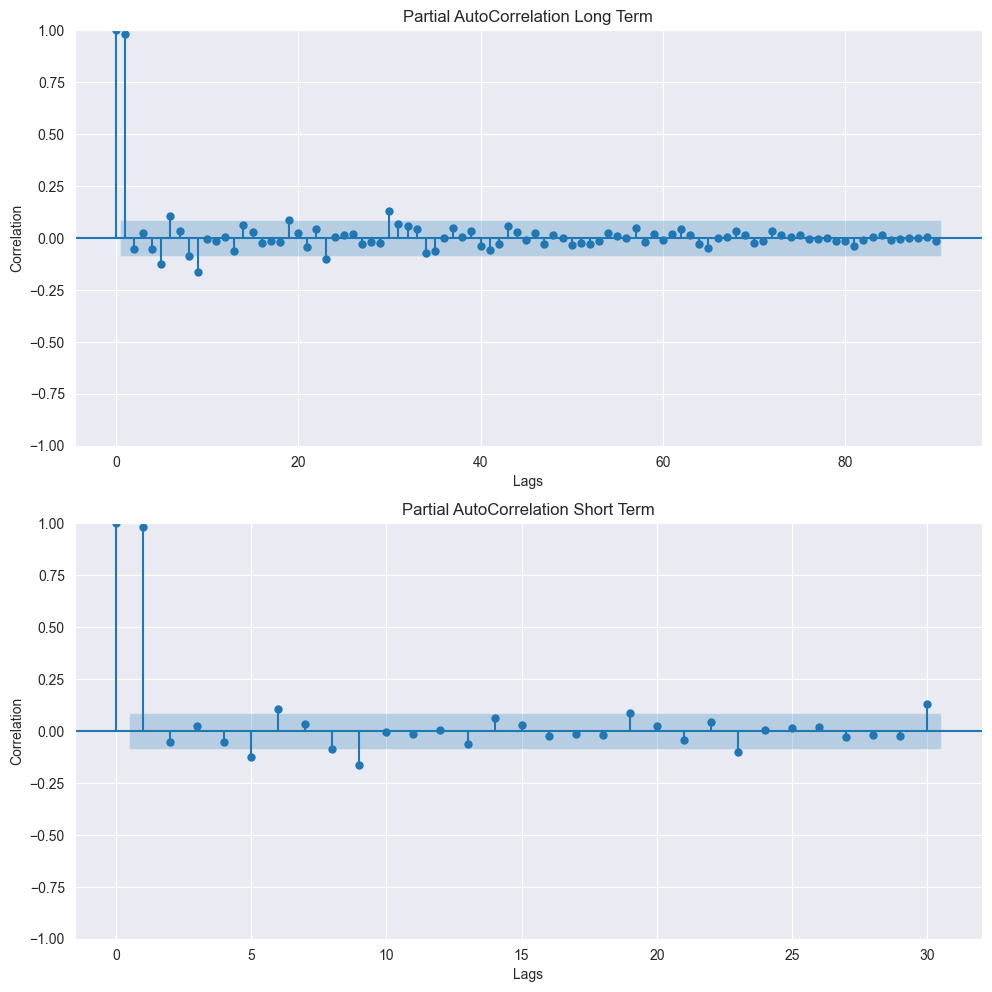

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

# Partial AutoCorrelation for Long Term
pacf = plot_pacf(monthly_df, lags=90, ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')

# Partial AutoCorrelation for Short Term
pacf = plot_pacf(monthly_df, lags=30, ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

plt.tight_layout(pad=1)
plt.show()

PACF Plot

The partial autocorrelation plots show significant direct correlation at the first lag for both long-term and short-term views, which quickly diminishes and becomes statistically insignificant for subsequent lags, suggesting a potential AR(1) process where only the immediate past value has a direct impact on the current value.